<a href="https://colab.research.google.com/github/shyamjith94/data-science-tips/blob/outliers-handling/OutliersHandling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("bigmart.csv")

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Checking Univarient Outliers


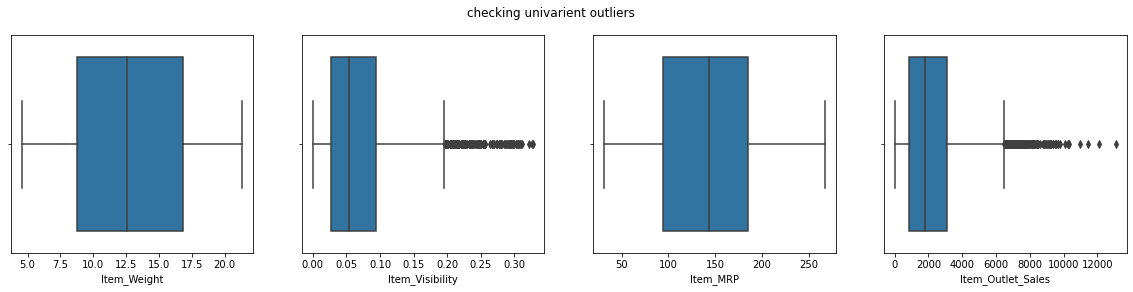

In [ ]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 4, 1)
sn.boxplot(x=data['Item_Weight'])

plt.subplot(1, 4, 2)
sn.boxplot(x=data['Item_Visibility'])

plt.subplot(1, 4, 3)
sn.boxplot(x=data['Item_MRP'])

plt.subplot(1, 4, 4)
sn.boxplot(x=data['Item_Outlet_Sales'])

plt.suptitle("checking univarient outliers")
plt.show()

# Checking Bivarient Outliers

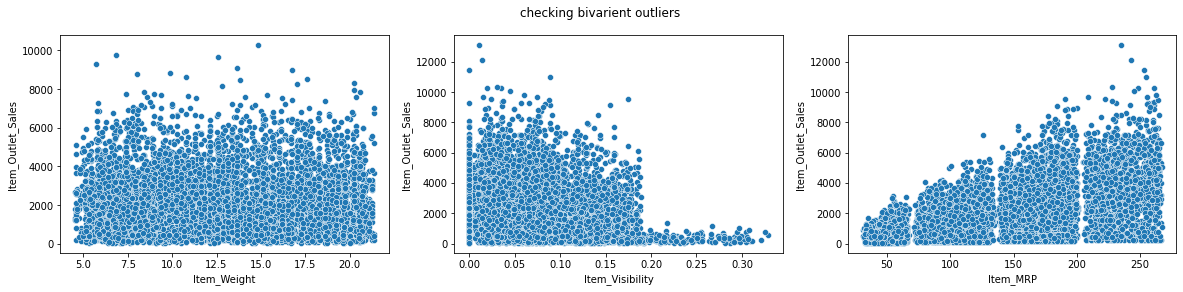

In [ ]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 3, 1)
sn.scatterplot(x=data['Item_Weight'], y=data['Item_Outlet_Sales'])

plt.subplot(1, 3, 2)
sn.scatterplot(x=data['Item_Visibility'], y=data['Item_Outlet_Sales'])

plt.subplot(1, 3, 3)
sn.scatterplot(x=data['Item_MRP'], y=data['Item_Outlet_Sales'])

plt.suptitle("checking bivarient outliers")
plt.show()

# Capping Outliers

In [ ]:
# capping outlet sales column
data["Item_Outlet_Sales"].values[data["Item_Outlet_Sales"].values>10000] = 10000

In [ ]:
data[data["Item_Outlet_Sales"].values>10000]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


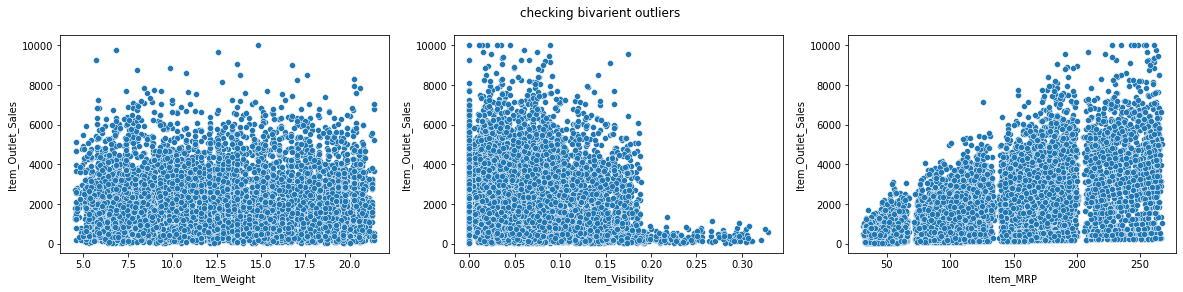

In [ ]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 3, 1)
sn.scatterplot(x=data['Item_Weight'], y=data['Item_Outlet_Sales'])

plt.subplot(1, 3, 2)
sn.scatterplot(x=data['Item_Visibility'], y=data['Item_Outlet_Sales'])

plt.subplot(1, 3, 3)
sn.scatterplot(x=data['Item_MRP'], y=data['Item_Outlet_Sales'])

plt.suptitle("checking bivarient outliers")
plt.show()

# Handling Missing Value

In [ ]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
data.shape

(8523, 12)

In [ ]:
data["Item_Weight"].fillna(data["Item_Weight"].mean(), inplace=True)
data["Outlet_Size"].fillna(data["Outlet_Size"].mode()[0], inplace=True)

In [ ]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

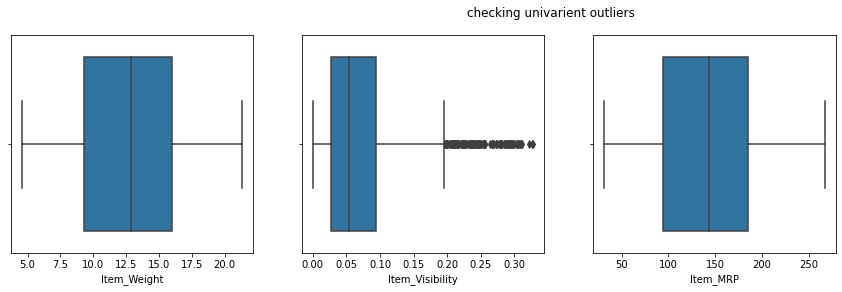

In [ ]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 4, 1)
sn.boxplot(x=data['Item_Weight'])

plt.subplot(1, 4, 2)
sn.boxplot(x=data['Item_Visibility'])

plt.subplot(1, 4, 3)
sn.boxplot(x=data['Item_MRP'])


plt.suptitle("checking univarient outliers")
plt.show()

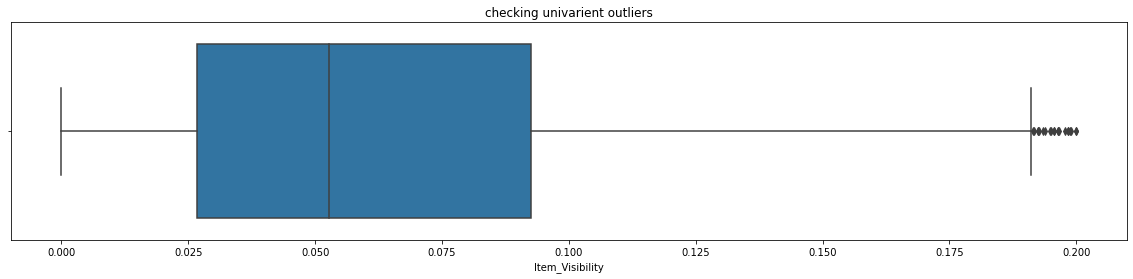

In [ ]:
# remove outlier item visibility column
data = data[data["Item_Visibility"]<=0.2]
sn.boxplot(x=data['Item_Visibility'])
plt.title("checking univarient outliers")
plt.show()

In [ ]:
# Item identifier column
data["Item_Identifier"].value_counts()

FDW13    10
NCI54     9
NCJ30     9
NCQ06     9
FDV38     9
         ..
FDQ60     1
FDY43     1
FDY32     1
FDC23     1
FDO33     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [ ]:
# Item identifier column
data["Item_Identifier"] = data["Item_Identifier"].apply(lambda x: x[0:2])
data["Item_Identifier"].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


FD    6016
NC    1583
DR     790
Name: Item_Identifier, dtype: int64